# Corona Cases Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
dataset=pd.read_csv('Corona Cases.csv')

In [3]:
dataset

,S.No,Confirmed cases per day,Deaths per day,Recovered per day,Active Cases
0,1,8979,9783,7627,2026
1,2,4368,3188,9894,3393
2,3,3429,4963,7423,2332
3,4,2098,2424,3911,5103
4,5,3258,2576,2614,4348
...,...,...,...,...,...
195,196,6328,6720,6868,6002
196,197,9002,4953,3403,7929
197,198,6525,9673,8627,9544
198,199,9215,3907,4171,8085


## Linear Regression

In [4]:
x=dataset['Active Cases'].values.reshape(-1,1)
y=dataset['Recovered per day'].values.reshape(-1,1)

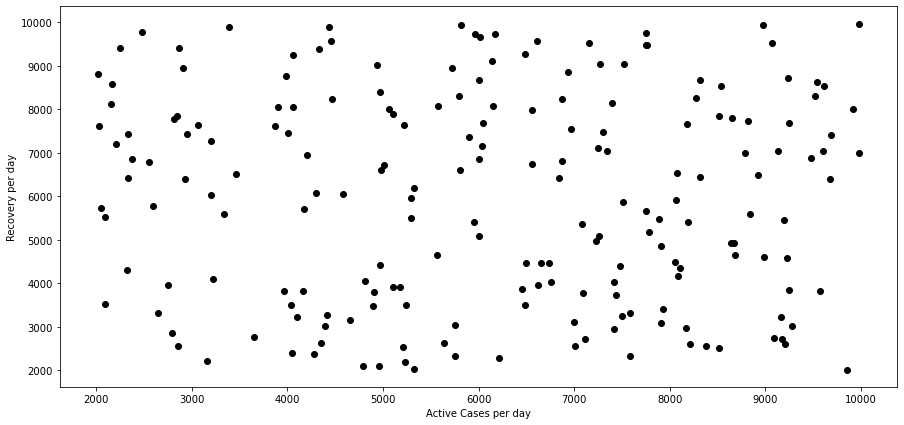

In [5]:
plt.figure(figsize=(15,7))
plt.scatter(x,y,c='black')
plt.xlabel("Active Cases per day")
plt.ylabel("Recovery per day")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3,random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

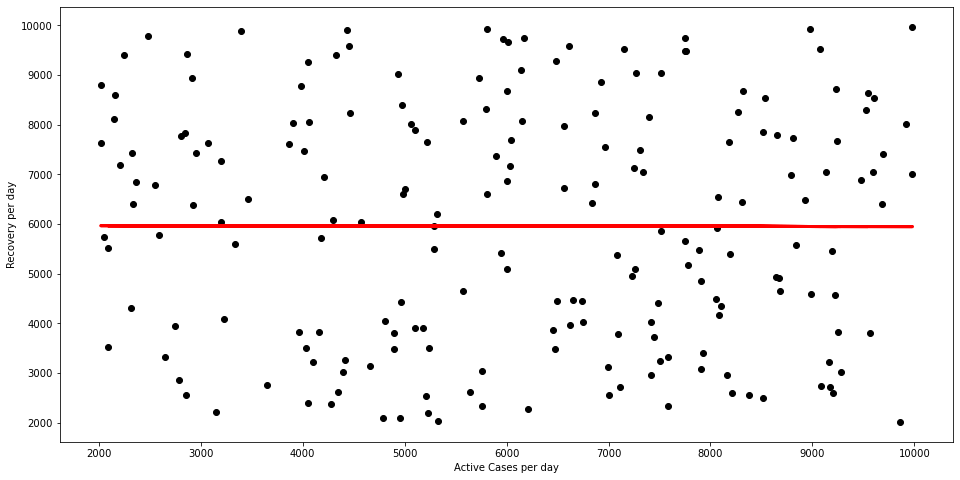

In [8]:
y_pred = reg.predict(x_test)
plt.figure(figsize=(16,8))
plt.scatter(x,y, c='black')
plt.plot(
    x_test,
    y_pred,
    c='red',
    linewidth=3
)
plt.xlabel("Active Cases per day")
plt.ylabel("Recovery per day")
plt.show()

In [9]:
reg.coef_

array([[-0.00224627]])

In [10]:
reg.intercept_

array([5970.53947295])

In [11]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.0011483054490710742

In [12]:
output=reg.predict([[276.12]])
output

array([[5969.91923316]])

## Multiple Linear Regression

In [15]:
x=dataset.drop(['Active Cases'],axis=1)
y=dataset['Active Cases'].values.reshape(-1,1)

In [16]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3,random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
multiple_reg=LinearRegression()
multiple_reg.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred = multiple_reg.predict(x_test)

In [19]:
multiple_reg.intercept_

array([5404.63569298])

In [20]:
multiple_reg.coef_

array([[ 9.29058615e+00,  1.17060965e-02, -2.59468866e-02,
        -5.73541342e-03]])

## Evaluating the Metrices

In [21]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))

2135.457126099263


In [22]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

-0.08664321055910418